In [ ]:
from base_for_time import EnhancedUTRP, create_sample_problem

W, D = create_sample_problem(n=10)

utrp_solver = EnhancedUTRP(
    weight_matrix=W,
    demand_matrix=D,
    min_vertices=3,
    max_vertices=8,
    num_routes=5
)

print("Запуск DBMOSA...")
dbmosa_solution, dbmosa_att, dbmosa_trt = utrp_solver.dbmosa(max_iterations=500)
print(f"DBMOSA Результат: ATT={dbmosa_att:.2f}, TRT={dbmosa_trt:.2f}")

print("\nЗапуск NSGA-II...")
nsga_front = utrp_solver.nsga_ii(population_size=30, generations=50)
if nsga_front:
    best_nsga = min(nsga_front, key=lambda x: (x[1], x[2]))
    print(f"NSGA-II Лучшее: ATT={best_nsga[1]:.2f}, TRT={best_nsga[2]:.2f}")
    print(f"Размер Pareto front: {len(nsga_front)}")

print("\nСтатистика операторов:")
for llh_name in utrp_solver.operators.keys():
    apps = utrp_solver.llh_applications[llh_name]
    success = utrp_solver.llh_successes[llh_name]
    success_rate = success / apps if apps > 0 else 0
    print(f"Оператор {llh_name}: Применений={apps}, Успехов={success}, "
            f"Успешность={success_rate:.2f}")

Запуск DBMOSA...
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
DBMOSA Iteration 0: Temp=0.9500, Archive size=2, Best ATT=17.39
DBMOSA Iteration 100: Temp=0.0056, Archive size=31, Best ATT=16.78
DBMOSA Iteration 200: Temp=0.0000, Archive size=44, Best ATT=16.78
DBMOSA Iteration 300: Temp=0.0000, Archive size=72, Best ATT=16.78
DBMOSA Iteration 400: Temp=0.0000, Archive size=125, Best ATT=16.78
DBMOSA Результат: ATT=16.78, TRT=160.74

Запуск NSGA-II...
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
NSGA-II Generation 0: Best compromise: ATT=17.69, TRT=175.59 | Front: ATT=[17.69-18.32], TRT=[172.84-175.59], size=2
NSGA-II Generation 10: Best compromise: ATT=16.48, TRT=168.89 | Front: ATT=[16.48-18.88], TRT=[114.80-168.89], size=11
NSGA-II Generation 20: Best compromise: ATT=16.57, TRT=155.84 | Front: ATT=[16.57-22.63], TRT=[83.95-155.84], size=12
NSGA-II Generation 30: Best compromise: ATT=18.14, TRT=

In [ ]:
# Проверка маршрутов
from base_for_time import EnhancedUTRP, create_sample_problem

W, D = create_sample_problem(n=10)

utrp_solver = EnhancedUTRP(
    weight_matrix=W,
    demand_matrix=D,
    min_vertices=3,
    max_vertices=8,
    num_routes=5
)

# Генерируем начальные решения
solutions = utrp_solver.generate_initial_solutions(k=5, num_solutions=1)
print(f"Сгенерировано решений: {len(solutions)}")

if solutions:
    solution = solutions[0]
    print(f"Количество маршрутов: {len(solution)}")
    
    for i, route in enumerate(solution):
        print(f"\nМаршрут {i+1}: {route}")
        print(f"  Длина: {len(route)}")
        
        # Проверяем связность
        is_connected = True
        for j in range(len(route)-1):
            weight = W[route[j]][route[j+1]]
            print(f"  {route[j]} -> {route[j+1]}: {weight:.2f}")
            if weight >= float('inf'):
                is_connected = False
                print(f"    РАЗРЫВ!")
        
        print(f"  Связность: {is_connected}")
        
    # Проверяем feasibility
    print(f"\nFeasibility: {utrp_solver.is_feasible(solution)}")
    print(f"TRT: {utrp_solver.calculate_trt(solution)}")
    print(f"ATT: {utrp_solver.calculate_att(solution)}")

Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
Сгенерировано решений: 1
Количество маршрутов: 5

Маршрут 1: [0, 7, 8, 1, 5, 6]
  Длина: 6
  0 -> 7: 9.01
  7 -> 8: 1.70
  8 -> 1: 7.75
  1 -> 5: 1.65
  5 -> 6: 7.95
  Связность: True

Маршрут 2: [0, 7, 9, 4, 5, 1, 8]
  Длина: 7
  0 -> 7: 9.01
  7 -> 9: 8.68
  9 -> 4: 3.99
  4 -> 5: 7.12
  5 -> 1: 1.65
  1 -> 8: 7.75
  Связность: True

Маршрут 3: [2, 1, 8, 4, 5, 6]
  Длина: 6
  2 -> 1: 6.52
  1 -> 8: 7.75
  8 -> 4: 5.38
  4 -> 5: 7.12
  5 -> 6: 7.95
  Связность: True

Маршрут 4: [7, 9, 4, 5, 1, 8]
  Длина: 6
  7 -> 9: 8.68
  9 -> 4: 3.99
  4 -> 5: 7.12
  5 -> 1: 1.65
  1 -> 8: 7.75
  Связность: True

Маршрут 5: [2, 1, 5, 4, 8, 7]
  Длина: 6
  2 -> 1: 6.52
  1 -> 5: 1.65
  5 -> 4: 7.12
  4 -> 8: 5.38
  8 -> 7: 1.70
  Связность: True

Feasibility: True
TRT: 152.60260285124411
ATT: 9.928858243396924


## Итоговый тест с двумя алгоритмами

In [ ]:
from base_for_time import EnhancedUTRP, create_sample_problem
import time

n = 10
min_vertices = 3
max_vertices = 8
num_routes = 5

W, D = create_sample_problem(n=n)

utrp_solver = EnhancedUTRP(
    weight_matrix=W,
    demand_matrix=D,
    min_vertices=min_vertices,
    max_vertices=max_vertices,
    num_routes=num_routes
)

print(f"Параметры: n={n}, min_vertices={min_vertices}, max_vertices={max_vertices}, num_routes={num_routes}")
print()

# DBMOSA
print("1. DBMOSA")
print("-" * 60)
start = time.time()
dbmosa_solution, dbmosa_att, dbmosa_trt = utrp_solver.dbmosa(max_iterations=200)
dbmosa_time = time.time() - start
print(f"   Время: {dbmosa_time:.2f}с")
print(f"   ATT: {dbmosa_att:.2f} (средее время в пути)")
print(f"   TRT: {dbmosa_trt:.2f} (общее время маршрутов)")
print()

# NSGA-II
print("2. NSGA-II")
print("-" * 60)
start = time.time()
nsga_front = utrp_solver.nsga_ii(population_size=20, generations=30)
nsga_time = time.time() - start
print(f"   Время: {nsga_time:.2f}с")
print(f"   Размер Pareto front: {len(nsga_front)}")
if nsga_front:
    best_nsga = min(nsga_front, key=lambda x: (x[1], x[2]))
    print(f"   Лучшее решение ATT: {best_nsga[1]:.2f}, TRT: {best_nsga[2]:.2f}")
print()

# Статистика операторов
print("3. Статистика операторов (гиперэвристики)")
print("-" * 60)
for llh_name, operator_func in utrp_solver.operators.items():
    apps = utrp_solver.llh_applications[llh_name]
    success = utrp_solver.llh_successes[llh_name]
    success_rate = success / apps if apps > 0 else 0
    score = utrp_solver.llh_scores[llh_name]
    print(f"   {llh_name}: применений={apps:3d}, успехов={success:3d}, "
          f"успешность={success_rate:.2%}, score={score:3d}")
print()

Параметры: n=10, min_vertices=3, max_vertices=8, num_routes=5

1. DBMOSA
------------------------------------------------------------
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
DBMOSA Iteration 0: Temp=0.9500, Archive size=2, Best ATT=12.43
DBMOSA Iteration 100: Temp=0.0056, Archive size=9, Best ATT=5.89
DBMOSA Iteration 100: Temp=0.0056, Archive size=9, Best ATT=5.89
   Время: 6.95с
   ATT: 5.89 (средее время в пути)
   TRT: 103.84 (общее время маршрутов)

2. NSGA-II
------------------------------------------------------------
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
NSGA-II Generation 0: Best compromise: ATT=12.43, TRT=150.21 | Front: ATT=[12.43-12.86], TRT=[136.63-150.21], size=4
NSGA-II Generation 10: Best compromise: ATT=7.18, TRT=95.07 | Front: ATT=[7.18-8.43], TRT=[71.27-95.07], size=10
   Время: 6.95с
   ATT: 5.89 (средее время в пути)
   TRT: 103.84 (общее время маршрутов)

2. NSG

## Исследование зависимости времени работы от размера задачи

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from base_for_time import EnhancedUTRP, create_sample_problem

n_values = range(10, 71, 5)
min_vertices = 3
max_vertices = 8

dbmosa_times = []
nsga_times = []

print(f"{'n':<5} | {'DBMOSA (s)':<15} | {'NSGA-II (s)':<15}")
print("-" * 45)

for n in n_values:
    num_routes = n // 4
    
    W, D = create_sample_problem(n=n)
        
    utrp_solver = EnhancedUTRP(
        weight_matrix=W,
        demand_matrix=D,
        min_vertices=min_vertices,
        max_vertices=max_vertices,
        num_routes=num_routes
    )
        
    # DBMOSA
    start = time.time()
    utrp_solver.dbmosa(max_iterations=200, verbose=False) 
    dbmosa_times.append(time.time() - start)

    # NSGA-II
    start = time.time()
    utrp_solver.nsga_ii(population_size=20, generations=30, verbose=False)
    nsga_times.append(time.time() - start)

    print(f"{n:<5} | {dbmosa_times[-1]:<15.2f} | {nsga_times[-1]:<15.2f}")

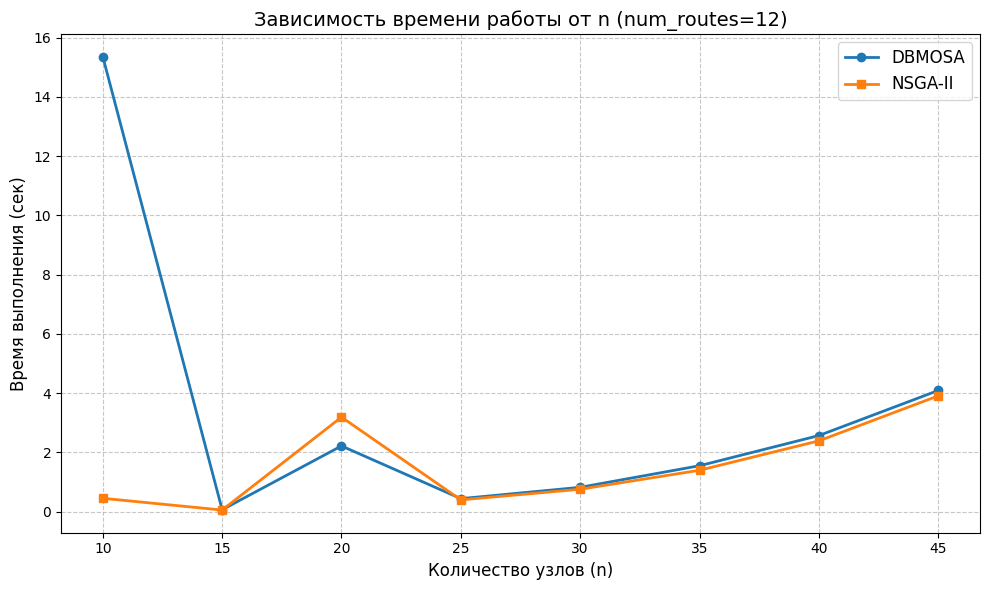

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_values[:8], dbmosa_times, 'o-', label='DBMOSA', linewidth=2)
plt.plot(n_values[:8], nsga_times, 's-', label='NSGA-II', linewidth=2)
plt.xlabel('Количество узлов (n)', fontsize=12)
plt.ylabel('Время выполнения (сек)', fontsize=12)
plt.title(f'Зависимость времени работы от n (num_routes={num_routes})', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from base_for_time import EnhancedUTRP, create_sample_problem

n_values = range(10, 71, 5)
min_vertices = 3
max_vertices = 8
num_experiments = 5  # Количество экспериментов для каждой точки

dbmosa_stats = {'mean': [], 'std': []}
nsga_stats = {'mean': [], 'std': []}

print(f"Запуск {num_experiments} экспериментов для каждой точки...")
print(f"{'n':<5} | {'DBMOSA (s)':<15} | {'NSGA-II (s)':<15}")
print("-" * 45)

for n in n_values:
    num_routes = n // 4
    
    current_dbmosa_times = []
    current_nsga_times = []
    
    for _ in range(num_experiments):
        W, D = create_sample_problem(n=n)
        
        utrp_solver = EnhancedUTRP(
            weight_matrix=W,
            demand_matrix=D,
            min_vertices=min_vertices,
            max_vertices=max_vertices,
            num_routes=num_routes
        )
        
        # DBMOSA
        start = time.time()
        utrp_solver.dbmosa(max_iterations=200, verbose=False) 
        current_dbmosa_times.append(time.time() - start)

        # NSGA-II
        start = time.time()
        utrp_solver.nsga_ii(population_size=20, generations=30, verbose=False)
        current_nsga_times.append(time.time() - start)

    dbmosa_mean = np.mean(current_dbmosa_times)
    dbmosa_std = np.std(current_dbmosa_times)
    nsga_mean = np.mean(current_nsga_times)
    nsga_std = np.std(current_nsga_times)
    
    dbmosa_stats['mean'].append(dbmosa_mean)
    dbmosa_stats['std'].append(dbmosa_std)
    nsga_stats['mean'].append(nsga_mean)
    nsga_stats['std'].append(nsga_std)
    
    print(f"{n:<5} | {dbmosa_mean:<6.2f} ± {dbmosa_std:<5.2f} | {nsga_mean:<6.2f} ± {nsga_std:<5.2f}")

plt.figure(figsize=(12, 7))

plt.errorbar(n_values, dbmosa_stats['mean'], yerr=dbmosa_stats['std'], 
             fmt='o-', label='DBMOSA', linewidth=2, capsize=5)
plt.errorbar(n_values, nsga_stats['mean'], yerr=nsga_stats['std'], 
             fmt='s-', label='NSGA-II', linewidth=2, capsize=5)

plt.xlabel('Количество узлов (n)', fontsize=12)
plt.ylabel('Время выполнения (сек)', fontsize=12)
plt.title(f'Зависимость времени работы от n (усреднено по {num_experiments} запускам)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Визуализации

Поиск оптимальных маршрутов...
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
NSGA-II Generation 0: Best compromise: ATT=14.28, TRT=205.41 | Front: ATT=[14.28-14.60], TRT=[181.16-205.41], size=3
NSGA-II Generation 10: Best compromise: ATT=13.69, TRT=227.85 | Front: ATT=[13.69-14.89], TRT=[161.20-227.85], size=11
NSGA-II Generation 20: Best compromise: ATT=13.52, TRT=216.13 | Front: ATT=[13.52-14.59], TRT=[171.51-216.13], size=8
Найдено решение: ATT=12.98, TRT=208.15
Маршруты: 7
NSGA-II Generation 10: Best compromise: ATT=13.69, TRT=227.85 | Front: ATT=[13.69-14.89], TRT=[161.20-227.85], size=11
NSGA-II Generation 20: Best compromise: ATT=13.52, TRT=216.13 | Front: ATT=[13.52-14.59], TRT=[171.51-216.13], size=8
Найдено решение: ATT=12.98, TRT=208.15
Маршруты: 7


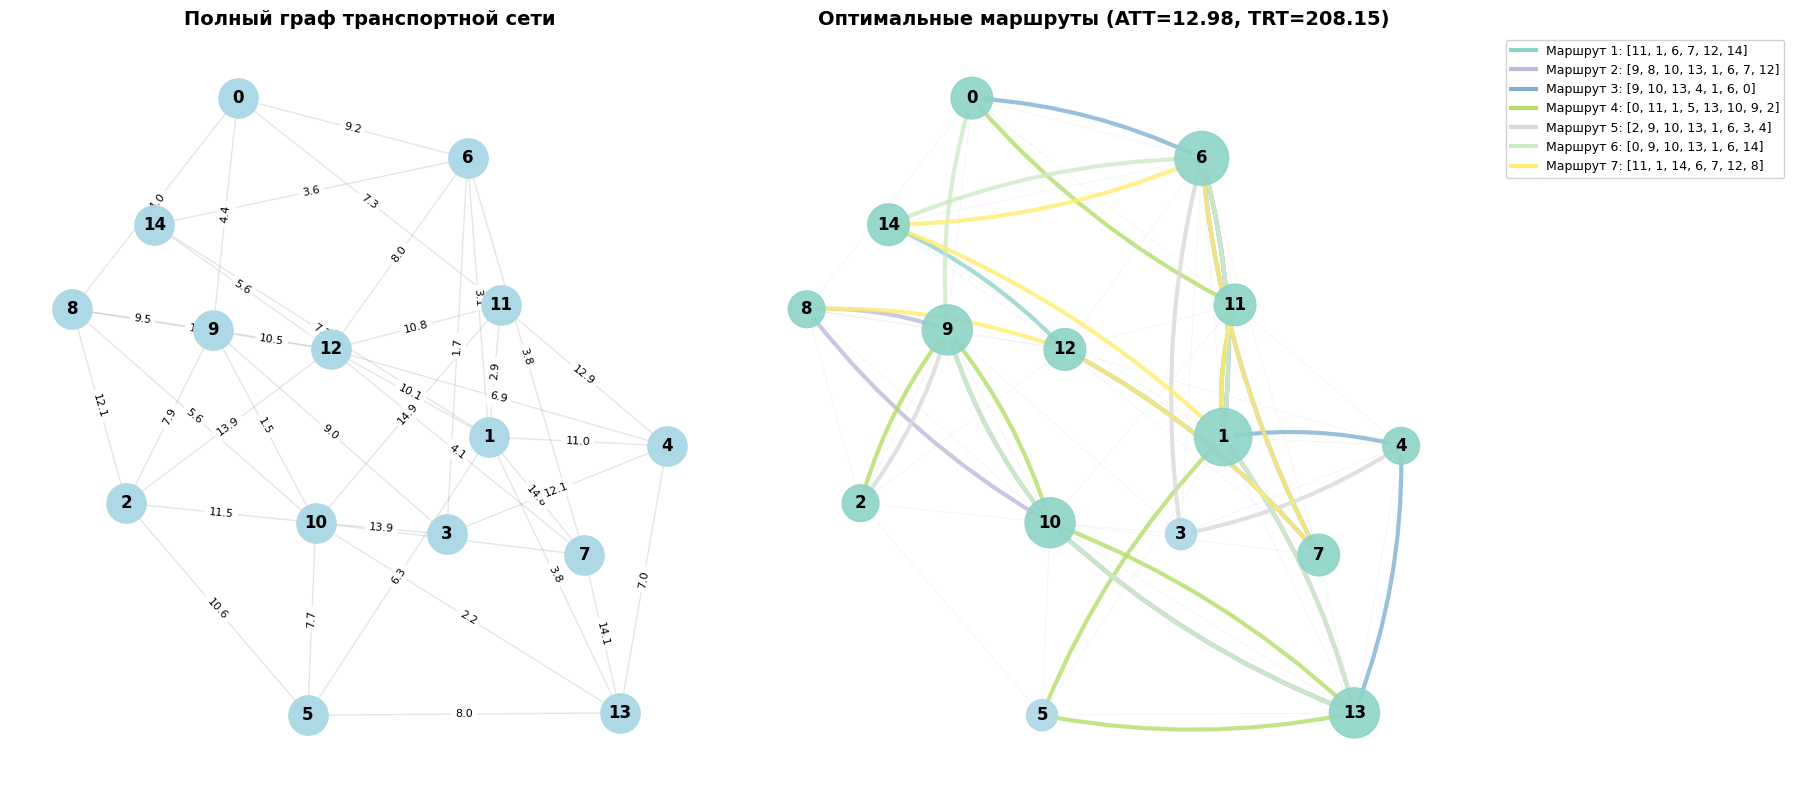


СТАТИСТИКА РЕШЕНИЯ
Маршрут 1: [11, 1, 6, 7, 12, 14]
  Длина: 6 узлов
  Время: 19.51

Маршрут 2: [9, 8, 10, 13, 1, 6, 7, 12]
  Длина: 8 узлов
  Время: 32.11

Маршрут 3: [9, 10, 13, 4, 1, 6, 0]
  Длина: 7 узлов
  Время: 33.92

Маршрут 4: [0, 11, 1, 5, 13, 10, 9, 2]
  Длина: 8 узлов
  Время: 35.94

Маршрут 5: [2, 9, 10, 13, 1, 6, 3, 4]
  Длина: 8 узлов
  Время: 32.19

Маршрут 6: [0, 9, 10, 13, 1, 6, 14]
  Длина: 7 узлов
  Время: 18.49

Маршрут 7: [11, 1, 14, 6, 7, 12, 8]
  Длина: 7 узлов
  Время: 35.99



In [ ]:
# Визуализация графа и найденных маршрутов
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from base_for_time import EnhancedUTRP, create_sample_problem

n = 15
min_vertices = 3
max_vertices = 8
num_routes = 7

np.random.seed(42)
W, D = create_sample_problem(n=n)

utrp_solver = EnhancedUTRP(
    weight_matrix=W,
    demand_matrix=D,
    min_vertices=min_vertices,
    max_vertices=max_vertices,
    num_routes=num_routes
)

# Запускаем NSGA-II для получения решения
print("Поиск оптимальных маршрутов...")
nsga_front = utrp_solver.nsga_ii(population_size=20, generations=30)
best_solution = min(nsga_front, key=lambda x: (x[1], x[2]))
routes = best_solution[0]
att, trt = best_solution[1], best_solution[2]

print(f"Найдено решение: ATT={att:.2f}, TRT={trt:.2f}")
print(f"Маршруты: {len(routes)}")

# Создаем граф
G = nx.Graph()
for i in range(len(W)):
    G.add_node(i)
    for j in range(i+1, len(W)):
        if W[i][j] < float('inf'):
            G.add_edge(i, j, weight=W[i][j])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

ax1 = axes[0]
pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2, width=1, edge_color='gray', ax=ax1)
edge_labels = {(i, j): f'{W[i][j]:.1f}' for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, ax=ax1)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=800, ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax1)

ax1.set_title('Полный граф транспортной сети', fontsize=14, fontweight='bold')
ax1.axis('off')


ax2 = axes[1]
colors = plt.cm.Set3(np.linspace(0, 1, len(routes)))
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, edge_color='gray', ax=ax2)
for route_idx, route in enumerate(routes):
    route_edges = [(route[i], route[i+1]) for i in range(len(route)-1)]

    nx.draw_networkx_edges(G, pos, edgelist=route_edges,
                          width=3, alpha=0.8, edge_color=[colors[route_idx]],
                          ax=ax2, arrows=True, arrowsize=20, 
                          connectionstyle='arc3,rad=0.1')

node_usage = {}
for route in routes:
    for node in route:
        node_usage[node] = node_usage.get(node, 0) + 1

node_sizes = [300 + node_usage.get(i, 0) * 200 for i in G.nodes()]
node_colors_list = [colors[0] if node_usage.get(i, 0) > 1 else 'lightblue' 
                    for i in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors_list,
                      node_size=node_sizes, ax=ax2, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax2)

legend_elements = []
for i, route in enumerate(routes):
    legend_elements.append(plt.Line2D([0], [0], color=colors[i], lw=3, 
                                     label=f'Маршрут {i+1}: {route}'))

ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1),
          fontsize=9, framealpha=0.9)

ax2.set_title(f'Оптимальные маршруты (ATT={att:.2f}, TRT={trt:.2f})', 
             fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("СТАТИСТИКА РЕШЕНИЯ")
print("="*60)
for i, route in enumerate(routes):
    route_time = sum(W[route[j]][route[j+1]] for j in range(len(route)-1))
    print(f"Маршрут {i+1}: {route}")
    print(f"  Длина: {len(route)} узлов")
    print(f"  Время: {route_time:.2f}")
    print()


Поиск Pareto front...
Генерация 5 кратчайших путей для всех пар вершин...
Сгенерировано 10 кандидатов в маршруты
NSGA-II Generation 0: Best compromise: ATT=11.58, TRT=131.51 | Front: ATT=[11.58-11.91], TRT=[126.77-131.51], size=3
NSGA-II Generation 10: Best compromise: ATT=11.34, TRT=134.34 | Front: ATT=[11.34-12.40], TRT=[93.61-134.34], size=7
NSGA-II Generation 10: Best compromise: ATT=11.34, TRT=134.34 | Front: ATT=[11.34-12.40], TRT=[93.61-134.34], size=7
NSGA-II Generation 20: Best compromise: ATT=11.13, TRT=151.92 | Front: ATT=[11.13-12.51], TRT=[73.64-151.92], size=11
NSGA-II Generation 20: Best compromise: ATT=11.13, TRT=151.92 | Front: ATT=[11.13-12.51], TRT=[73.64-151.92], size=11
NSGA-II Generation 30: Best compromise: ATT=11.16, TRT=130.18 | Front: ATT=[11.16-12.26], TRT=[80.41-130.18], size=13
NSGA-II Generation 30: Best compromise: ATT=11.16, TRT=130.18 | Front: ATT=[11.16-12.26], TRT=[80.41-130.18], size=13
NSGA-II Generation 40: Best compromise: ATT=11.10, TRT=117.15 | 

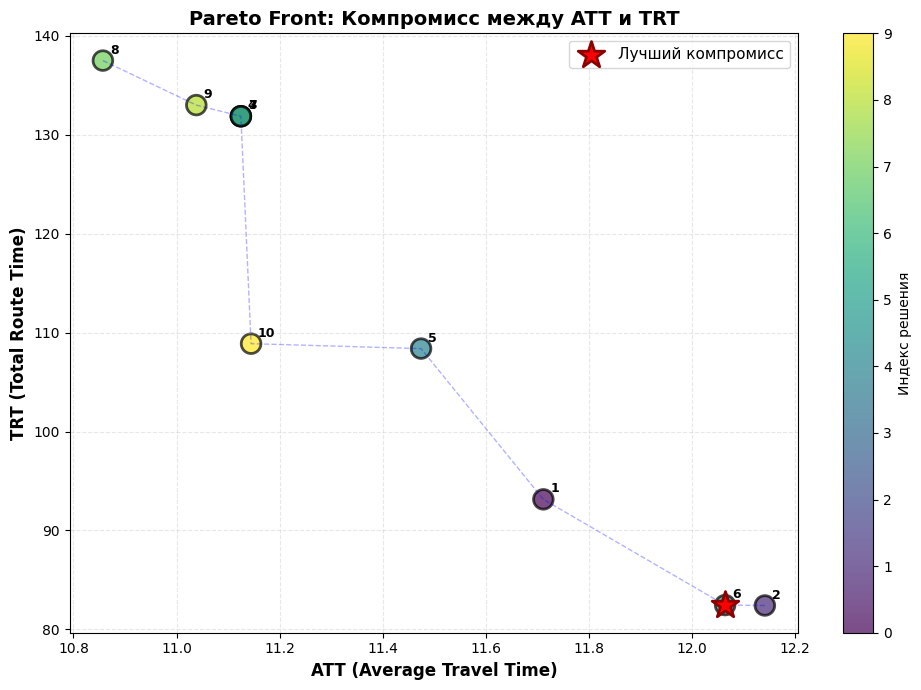


АНАЛИЗ PARETO FRONT
Всего решений в Pareto front: 10

Диапазон значений:
  ATT: [10.86 - 12.14]
  TRT: [82.41 - 137.51]

Топ-5 решений по ATT:
  1. Решение #8: ATT=10.86, TRT=137.51
  2. Решение #9: ATT=11.04, TRT=133.01
  3. Решение #3: ATT=11.12, TRT=131.88
  4. Решение #4: ATT=11.12, TRT=131.88
  5. Решение #7: ATT=11.12, TRT=131.88

Топ-5 решений по TRT:
  1. Решение #2: ATT=12.14, TRT=82.41
  2. Решение #6: ATT=12.06, TRT=82.45
  3. Решение #1: ATT=11.71, TRT=93.14
  4. Решение #5: ATT=11.47, TRT=108.39
  5. Решение #10: ATT=11.14, TRT=108.89

Лучшее компромиссное решение (#6):
  ATT: 12.06
  TRT: 82.45
  Маршруты: [[2, 5, 1, 6, 3, 7, 9], [0, 6, 3, 7, 8, 9], [2, 5, 1], [0, 6, 3], [0, 6, 1, 4, 3, 7]]


In [ ]:
# Визуализация Pareto Front
import matplotlib.pyplot as plt
import numpy as np
from base_for_time import EnhancedUTRP, create_sample_problem

# Создаем задачу
np.random.seed(42)
W, D = create_sample_problem(n=10)

utrp_solver = EnhancedUTRP(
    weight_matrix=W,
    demand_matrix=D,
    min_vertices=3,
    max_vertices=8,
    num_routes=5
)

print("Поиск Pareto front...")
nsga_front = utrp_solver.nsga_ii(population_size=30, generations=50)

# Извлекаем значения ATT и TRT
att_values = [sol[1] for sol in nsga_front]
trt_values = [sol[2] for sol in nsga_front]

# Находим лучшее компромиссное решение
best_solution_idx = np.argmin([att + trt/10 for att, trt in zip(att_values, trt_values)])

# Создаем визуализацию
fig, ax = plt.subplots(figsize=(10, 7))

# Рисуем все точки Pareto front
scatter = ax.scatter(att_values, trt_values, 
                    c=range(len(att_values)), 
                    cmap='viridis', 
                    s=200, 
                    alpha=0.7,
                    edgecolors='black',
                    linewidths=2)

# Выделяем лучшее компромиссное решение
ax.scatter(att_values[best_solution_idx], 
          trt_values[best_solution_idx],
          c='red', 
          s=400, 
          marker='*',
          edgecolors='darkred',
          linewidths=2,
          label='Лучший компромисс',
          zorder=5)

# Соединяем точки линией для наглядности
sorted_indices = sorted(range(len(att_values)), key=lambda i: att_values[i])
sorted_att = [att_values[i] for i in sorted_indices]
sorted_trt = [trt_values[i] for i in sorted_indices]
ax.plot(sorted_att, sorted_trt, 'b--', alpha=0.3, linewidth=1)

# Подписываем точки
for i, (att, trt) in enumerate(zip(att_values, trt_values)):
    ax.annotate(f'{i+1}', 
               (att, trt), 
               xytext=(5, 5), 
               textcoords='offset points',
               fontsize=9,
               fontweight='bold')

# Настройка графика
ax.set_xlabel('ATT (Average Travel Time)', fontsize=12, fontweight='bold')
ax.set_ylabel('TRT (Total Route Time)', fontsize=12, fontweight='bold')
ax.set_title('Pareto Front: Компромисс между ATT и TRT', 
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

# Добавляем colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Индекс решения', fontsize=10)

plt.tight_layout()
plt.show()

# Статистика Pareto front
print("\n" + "="*70)
print("АНАЛИЗ PARETO FRONT")
print("="*70)
print(f"Всего решений в Pareto front: {len(nsga_front)}")
print(f"\nДиапазон значений:")
print(f"  ATT: [{min(att_values):.2f} - {max(att_values):.2f}]")
print(f"  TRT: [{min(trt_values):.2f} - {max(trt_values):.2f}]")

print(f"\nТоп-5 решений по ATT:")
sorted_by_att = sorted(enumerate(nsga_front), key=lambda x: x[1][1])
for i, (idx, sol) in enumerate(sorted_by_att[:5]):
    print(f"  {i+1}. Решение #{idx+1}: ATT={sol[1]:.2f}, TRT={sol[2]:.2f}")

print(f"\nТоп-5 решений по TRT:")
sorted_by_trt = sorted(enumerate(nsga_front), key=lambda x: x[1][2])
for i, (idx, sol) in enumerate(sorted_by_trt[:5]):
    print(f"  {i+1}. Решение #{idx+1}: ATT={sol[1]:.2f}, TRT={sol[2]:.2f}")

print(f"\nЛучшее компромиссное решение (#{best_solution_idx+1}):")
best_sol = nsga_front[best_solution_idx]
print(f"  ATT: {best_sol[1]:.2f}")
print(f"  TRT: {best_sol[2]:.2f}")
print(f"  Маршруты: {best_sol[0]}")